In [1]:
# Libraries
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set_style("darkgrid")
sb.set(style="white")
sb.set(style="whitegrid", color_codes=True)

import numpy as np

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from scipy import stats
from pandas import Series, DataFrame
from pandas.plotting import autocorrelation_plot
#from pandas.tools.plotting import scatter_matrix
from pylab import rcParams
from matplotlib import collections as collections
from matplotlib.patches import Rectangle
from itertools import cycle

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import warnings
warnings.filterwarnings('ignore')

rcParams['figure.figsize'] = 5,4
#sb.set_style('whitegrid')
from numpy import median
from numpy import mean


In [2]:
dataset = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
dataset['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [4]:
dataset.head()

,pregnancies,glucose,bloodPressure,skinThickness,insulin,BMI,diabetesPedigreeFunction,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.shape

(768, 9)

In [6]:
dataset.isna().sum()

pregnancies                 0
glucose                     0
bloodPressure               0
skinThickness               0
insulin                     0
BMI                         0
diabetesPedigreeFunction    0
age                         0
class                       0
dtype: int64

In [7]:
#Duplicate rows
dataset.drop_duplicates(subset=None, inplace=True)

In [8]:
dataset.shape


(768, 9)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodPressure             768 non-null    int64  
 3   skinThickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   diabetesPedigreeFunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   class                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


### Gráficos

In [10]:
sb.set_style("darkgrid")
sb.set(style="white")
sb.set(style="whitegrid", color_codes=True)


<AxesSubplot:xlabel='pregnancies', ylabel='Density'>

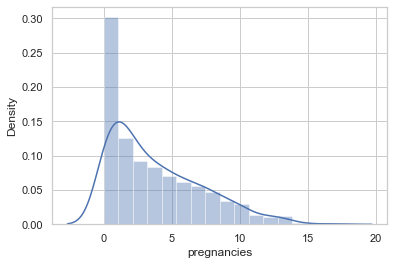

In [11]:
sb.distplot(dataset['pregnancies'])

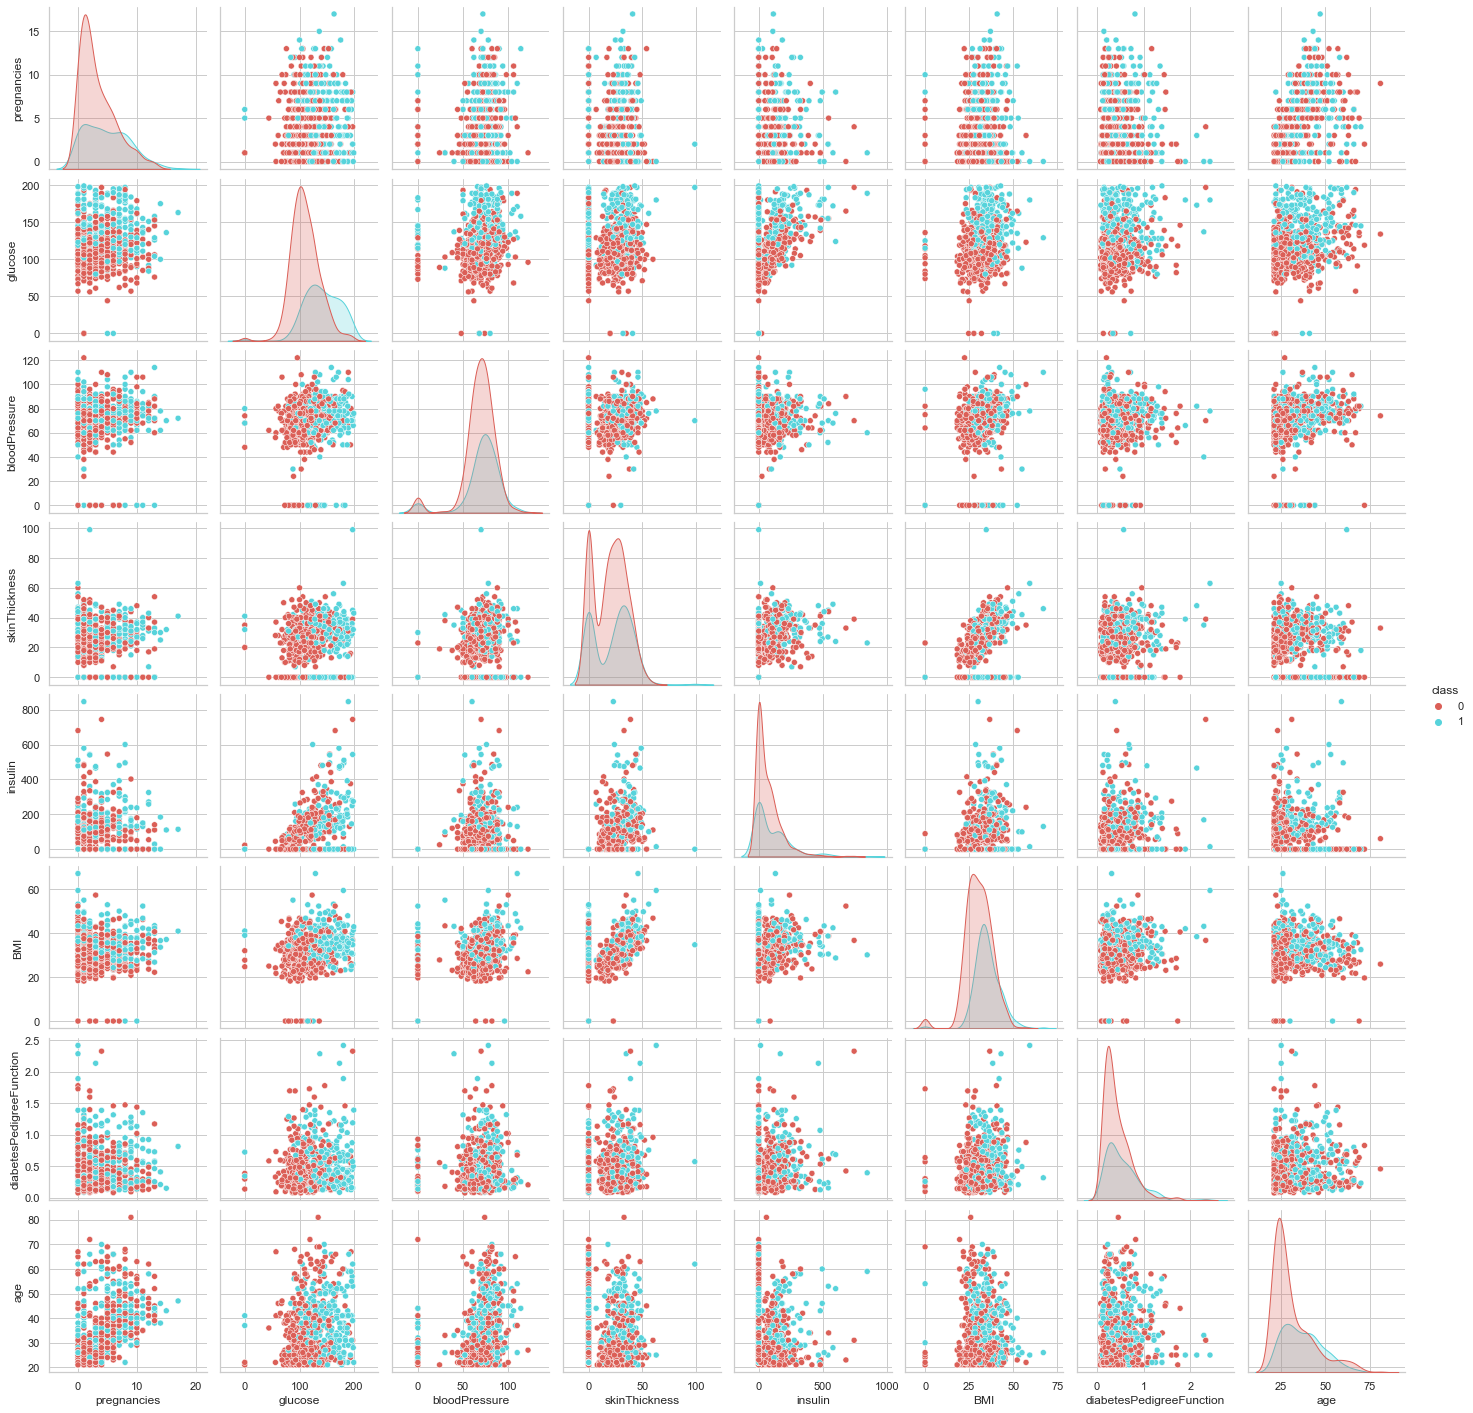

In [12]:
sb.pairplot(dataset, hue = "class", palette = 'hls')

In [13]:
dataset['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodPressure             768 non-null    int64  
 3   skinThickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   diabetesPedigreeFunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   class                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 76.2 KB


<AxesSubplot:xlabel='class', ylabel='pregnancies'>

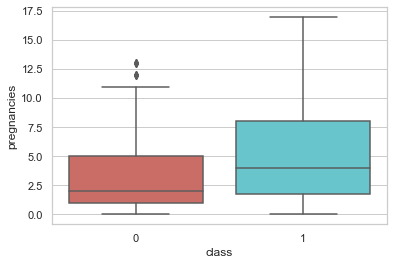

In [15]:
sb.boxplot(x='class', y='pregnancies', data=dataset, palette='hls')

<AxesSubplot:xlabel='class', ylabel='glucose'>

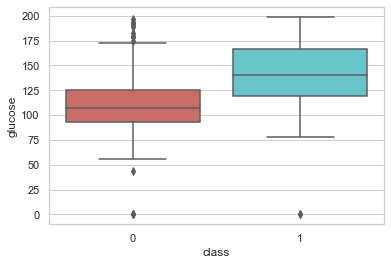

In [16]:
sb.boxplot(x='class', y='glucose', data=dataset, palette='hls')

<AxesSubplot:xlabel='class', ylabel='bloodPressure'>

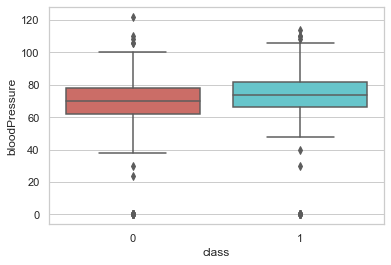

In [17]:
sb.boxplot(x='class', y='bloodPressure', data=dataset, palette='hls')

<AxesSubplot:xlabel='class', ylabel='skinThickness'>

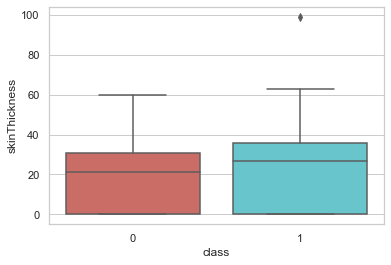

In [18]:
sb.boxplot(x='class', y='skinThickness', data=dataset, palette='hls')

<AxesSubplot:xlabel='class', ylabel='insulin'>

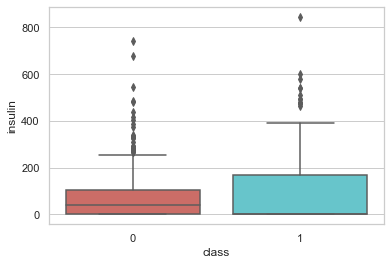

In [19]:
sb.boxplot(x='class', y='insulin', data=dataset, palette='hls')

<AxesSubplot:xlabel='class', ylabel='BMI'>

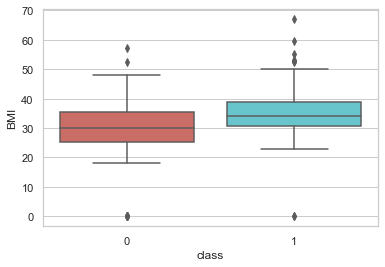

In [20]:
sb.boxplot(x='class', y='BMI', data=dataset, palette='hls')

<AxesSubplot:xlabel='class', ylabel='diabetesPedigreeFunction'>

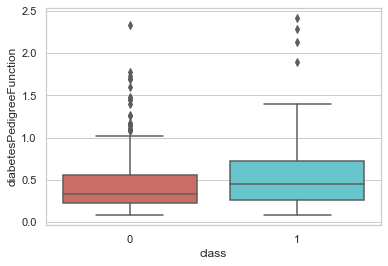

In [21]:
sb.boxplot(x='class', y='diabetesPedigreeFunction', data=dataset, palette='hls')

<AxesSubplot:xlabel='class', ylabel='age'>

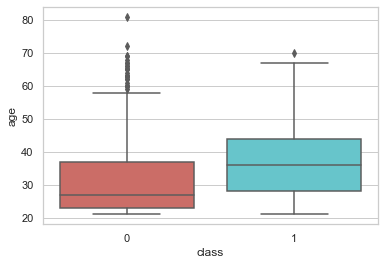

In [22]:
sb.boxplot(x='class', y='age', data=dataset, palette='hls')

In [23]:
irisCorr = dataset.corr(method='pearson')
irisCorr

,pregnancies,glucose,bloodPressure,skinThickness,insulin,BMI,diabetesPedigreeFunction,age,class
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


(9.5, -0.5)

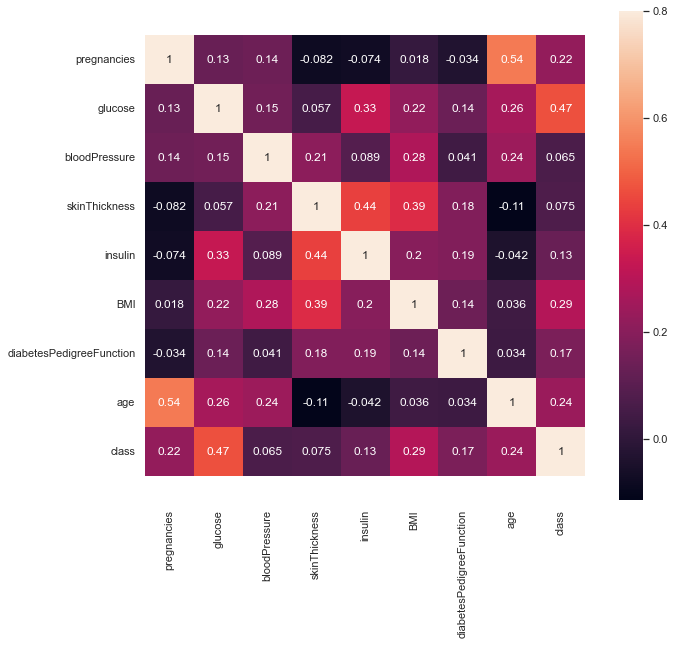

In [24]:
# Correlation
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
ax=sb.heatmap(corrmat, vmax=.8, square=True, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)


<AxesSubplot:xlabel='pregnancies', ylabel='glucose'>

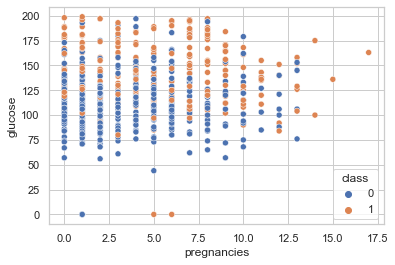

In [25]:
sb.scatterplot(x='pregnancies', y='glucose', hue = 'class', data=dataset)#, alpha=0.5)

In [26]:
dataset.head(20)

,pregnancies,glucose,bloodPressure,skinThickness,insulin,BMI,diabetesPedigreeFunction,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [27]:
# Standardize
names = ['pregnancies', 'glucose', 'bloodPressure', 'skinThickness', 'insulin',
       'BMI', 'diabetesPedigreeFunction', 'age']
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(dataset[names])
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [28]:
scaled_df.head()

,pregnancies,glucose,bloodPressure,skinThickness,insulin,BMI,diabetesPedigreeFunction,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [29]:
resultado = pd.concat([scaled_df, dataset['class']], axis = 1)

In [30]:
resultado.head()

,pregnancies,glucose,bloodPressure,skinThickness,insulin,BMI,diabetesPedigreeFunction,age,class
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [31]:
y = resultado['class']
X = resultado.loc[:, resultado.columns != 'class']

In [32]:
#from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[141  16]
 [ 35  39]]


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



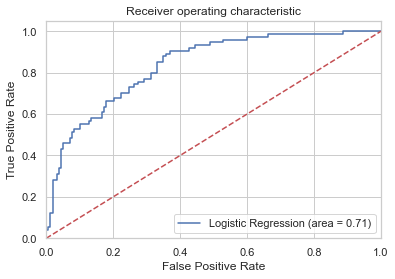

In [36]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()